### Import Libraries

In [1]:
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from scipy import stats

### Connect to PostgreSQL Database, Query Tables, & Create Pandas DataFrames from them

In [2]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM Country
;'''

cur.execute(query)

In [3]:
countries_data = cur.fetchall()
countries_df = pd.DataFrame(countries_data)
countries_df.columns = [i[0] for i in cur.description]
countries_df.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [4]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM League
;'''

cur.execute(query)

league_data = cur.fetchall()
league_df = pd.DataFrame(league_data)
league_df.columns = [i[0] for i in cur.description]
league_df.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [5]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM Match
;'''

cur.execute(query)

match_data = cur.fetchall()
match_df = pd.DataFrame(match_data)
match_df.columns = [i[0] for i in cur.description]

In [6]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM Player_Attributes
;'''

cur.execute(query)

player_attrib_data = cur.fetchall()
player_attrib_df = pd.DataFrame(player_attrib_data)
player_attrib_df.columns = [i[0] for i in cur.description]
player_attrib_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [7]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM Team
;'''

cur.execute(query)

team_data = cur.fetchall()
team_df = pd.DataFrame(team_data)
team_df.columns = [i[0] for i in cur.description]
team_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [8]:
conn = psycopg2.connect('dbname=soccer')
cur = conn.cursor()

query = '''
SELECT *
FROM Team_Attributes
;'''

cur.execute(query)

team_attrib_data = cur.fetchall()
team_attrib_df = pd.DataFrame(team_attrib_data)
team_attrib_df.columns = [i[0] for i in cur.description]
team_attrib_df.head()

,id,team_fifa_api_id,team_api_id,date,buildupplayspeed,buildupplayspeedclass,buildupplaydribbling,buildupplaydribblingclass,buildupplaypassing,buildupplaypassingclass,...,chancecreationshooting,chancecreationshootingclass,chancecreationpositioningclass,defencepressure,defencepressureclass,defenceaggression,defenceaggressionclass,defenceteamwidth,defenceteamwidthclass,defencedefenderlineclass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [9]:
player_df = pd.read_csv('player.csv')
player_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


## HYPOTHESIS TEST 1:
##### Is there a statistical difference in the odds of winning a game when a team is playing in front of their home crowd?

- H0 (Null Hypothesis): mean_win_rate_home = mean_win_rate_away
    - there is no statistically significant difference in the odds of winning a game when a team is at playing at home vs. when a team is playing away 
- HA (Alternative Hypothesis): mean_win_rate_home != mean_win_rate_away
    - there is a statistically significant difference in the odds of winning a game when a team is playing at home vs. when a team is playing away 

- Alpha = 0.05

##### Assumptions for a 2-sample T-test:
- Data is collected randomly
- Data is independent
- Data is approximately normally distributed

In [10]:
#create new columns home_team_win & away_team win with binary values as such:
#Home team winning = 1, Tie=0, Away team winning = 0
match_df['home_team_win'] = np.zeros
match_df['away_team_win'] = np.zeros

In [11]:
#WIN
match_df['home_team_win'].loc[match_df['home_team_goal'] > match_df['away_team_goal']] = 1
#LOSS
match_df['home_team_win'].loc[match_df['home_team_goal'] < match_df['away_team_goal']] = 0
#TIE
match_df['home_team_win'].loc[match_df['home_team_goal'] == match_df['away_team_goal']] = 0

#WIN
match_df['away_team_win'].loc[match_df['home_team_goal'] < match_df['away_team_goal']] = 1
#LOSS
match_df['away_team_win'].loc[match_df['home_team_goal'] > match_df['away_team_goal']] = 0
#TIE
match_df['away_team_win'].loc[match_df['home_team_goal'] == match_df['away_team_goal']] = 0

/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
#create numpy arrays
home_team_win_array = np.array(match_df['home_team_win'])
away_team_win_array = np.array(match_df['away_team_win'])

#the means of each array represent the win rate: win rate = matches won / matches NOT won (tie or loss)
x_bar_home = np.mean(home_team_win_array)
x_bar_away = np.mean(away_team_win_array)

#calculate the difference between the means, using all rows in the dataset
diff = x_bar_home - x_bar_away
diff

0.17133069017283187

In [13]:
len(home_team_win_array)

25979

#### Using Bootstrapping to sample from the ~25K matches, specifying # of iterations & sample size of each iteration

In [14]:
sample_means_home = []
for _ in range(50):
    sample_mean = np.random.choice(home_team_win_array,size=50).mean()
    sample_means_home.append(sample_mean)
len(sample_means_home)

sample_means_away = []
for _ in range(50):
    sample_mean = np.random.choice(away_team_win_array,size=50).mean()
    sample_means_away.append(sample_mean)
len(sample_means_away)

50

#### Results of bootstrapping yields 2 lists (home and away) of win rates, the length of which is indicative of the # of iterations in the previous for loop

In [15]:
sample_means_home

[0.38,
 0.4,
 0.52,
 0.38,
 0.3,
 0.54,
 0.42,
 0.46,
 0.3,
 0.46,
 0.5,
 0.36,
 0.44,
 0.36,
 0.52,
 0.44,
 0.5,
 0.48,
 0.34,
 0.42,
 0.56,
 0.5,
 0.44,
 0.34,
 0.52,
 0.44,
 0.36,
 0.48,
 0.46,
 0.34,
 0.36,
 0.5,
 0.5,
 0.5,
 0.32,
 0.5,
 0.52,
 0.4,
 0.46,
 0.5,
 0.36,
 0.42,
 0.4,
 0.36,
 0.4,
 0.46,
 0.4,
 0.56,
 0.46,
 0.42]

### Defining functions to calculate individual sample variances, pooled sample variance, and our t-statistic in a 2-sample T-test

In [16]:
def calc_variance(sample):
    '''Computes the variance a list of values'''
    sample_mean = np.mean(sample)
    return sum([(i - sample_mean)**2 for i in sample])

def calc_sample_variance(sample1, sample2):
    '''Computes the pooled variance 2 lists of values, using the calc_variance function'''
    n_1, n_2 = len(sample1), len(sample2)
    var1, var2 = calc_variance(sample1), calc_variance(sample2)
    return (var1 + var2) / ((n_1 + n_2) - 2)

def calc_twosample_tstatistic(expr, ctrl):
    '''Computes the 2-sample T-stat of 2 lists of values, using the calc_sample_variance function'''
    expr_mean, ctrl_mean = np.mean(expr), np.mean(ctrl)
    n_e, n_c = len(expr), len(ctrl)
    samp_var = calc_sample_variance(expr,ctrl)
    t = (expr_mean - ctrl_mean) / np.sqrt(samp_var * ((1/n_e)+(1/n_c)))
    return t

 - In this version of the t-test we are assuming equal variances in our experimental and control groups, which is a reasonable assumption

In [17]:
t_stat = calc_twosample_tstatistic(sample_means_home, sample_means_away)

t_stat

11.879179770829705

### Double-checking T-statistic & Calculating P-value with SciPy built-in T-test function

In [18]:
stats.ttest_ind(sample_means_home, sample_means_away)

Ttest_indResult(statistic=11.879179770829701, pvalue=1.0842285209148896e-20)

### Plotting distributions of sample_means_home (Blue) vs. sample_means_away (Orange)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


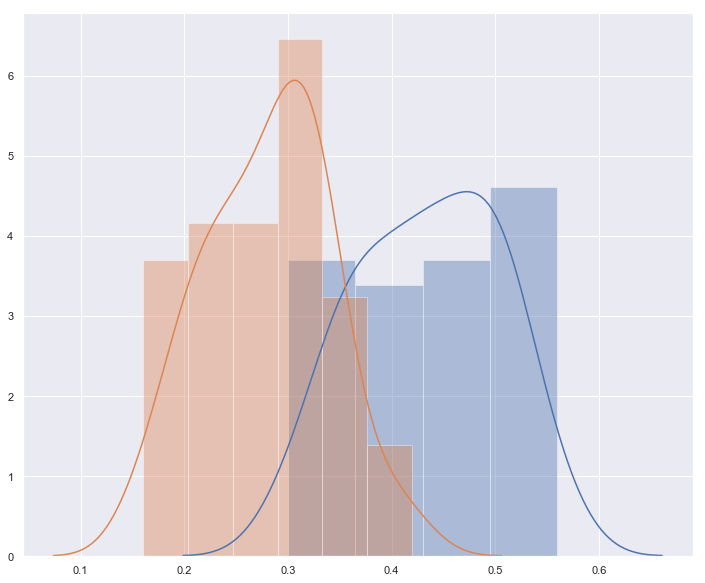

In [19]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(sample_means_home) # Blue distribution
sns.distplot(sample_means_away) # Orange distribution

### Visualizing the T-statistic & negative T-statistic in a probability density function graph

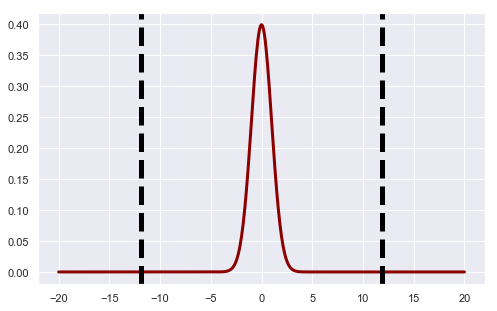

In [20]:
def visualize_t(t_stat, n_control, n_experimental):
    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    # generate points on the x axis between -20 and 20:
    xs = np.linspace(-20, 20, 500)

    # use stats.t.pdf to get values on the probability density function for the t-distribution
    ys= stats.t.pdf(xs, (n_control+n_experimental-2), 0, 1)
    ax.plot(xs, ys, linewidth=3, color='darkred')

    ax.axvline(t_stat, color='black', linestyle='--', lw=5)
    ax.axvline(-t_stat, color='black', linestyle='--', lw=5)

    plt.show()
    return None

n_home = len(home_team_win_array)
n_away = len(away_team_win_array)
visualize_t(t_stat, n_home, n_away)

- Our P-values can be represented by the (very, very small - nearly 0) sum of areas under the curve on the outer sides of our t-statistic

In [21]:
## Calculate p_value manually
# Lower tail comulative density function returns area under the lower tail curve
df = len(sample_means_home)+len(sample_means_home)-2

tail = stats.t.cdf(-t_stat, df, 0, 1)

p_value = tail*2
print(p_value)

1.0842285209148662e-20


In [22]:
#DOUBLE CHECK WITH SCIPY
stats.t.sf(abs(t_stat), len(sample_means_home)+len(sample_means_away)-2)*2

1.0842285209148662e-20

In [23]:
#TRIPLE CHECK WITH SCIPY
stats.ttest_ind(sample_means_home, sample_means_away)

Ttest_indResult(statistic=11.879179770829701, pvalue=1.0842285209148896e-20)

## Conclusion:
- We reject the Null Hypothesis (H0) at our alpha level of 0.05, concluding that there is no statistically significant difference between the average win rate of home teams and the average win rate of away teams. 
